Задача: определить параметры учащихся, влияющие на их оценку за экзамен по математике.

Этапы работы: импорт данных, очистка и предварительный анализ, оценка корреляции различных параметров, выводы (какие параметры являются важными, а какие - нет).

Для начала импортируем данные и определим общие характеристики.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

m = pd.read_csv('stud_math.csv')

display(m.head(10))
m.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

Итого: 17 строковых столбцов, 13 числовых (включая параметр score).

Для начала пройдём по каждому из столбцов и посмотрим на те значения, которые принимают переменные, чтобы оценить качество данных и устранить возможные выбросы, а также, возможно, заменить какие-то значения на более удобные для анализа.

Пустые значения заменять не будем, просто будем пользоваться dropna().

In [2]:
for col in m.columns:
    result = pd.concat([pd.DataFrame(m[col].value_counts(dropna=False)), (pd.DataFrame(
        m[col].value_counts(dropna=False, normalize=True))*100).round(1)], axis=1)
    result.columns = [col, "%"]
    display(result)

,school,%
GP,349,88.4
MS,46,11.6


,sex,%
F,208,52.7
M,187,47.3


,age,%
16,104,26.3
17,98,24.8
18,82,20.8
15,82,20.8
19,24,6.1
20,3,0.8
22,1,0.3
21,1,0.3


,address,%
U,295,74.7
R,83,21.0
NaN,17,4.3


,famsize,%
GT3,261,66.1
LE3,107,27.1
NaN,27,6.8


,Pstatus,%
T,314,79.5
NaN,45,11.4
A,36,9.1


,Medu,%
4.0,131,33.2
2.0,102,25.8
3.0,97,24.6
1.0,59,14.9
0.0,3,0.8
NaN,3,0.8


,Fedu,%
2.0,106,26.8
3.0,96,24.3
4.0,88,22.3
1.0,78,19.7
NaN,24,6.1
0.0,2,0.5
40.0,1,0.3


,Mjob,%
other,133,33.7
services,98,24.8
at_home,58,14.7
teacher,55,13.9
health,32,8.1
NaN,19,4.8


,Fjob,%
other,197,49.9
services,102,25.8
NaN,36,9.1
teacher,29,7.3
at_home,16,4.1
health,15,3.8


,reason,%
course,137,34.7
home,104,26.3
reputation,103,26.1
other,34,8.6
NaN,17,4.3


,guardian,%
mother,250,63.3
father,86,21.8
NaN,31,7.8
other,28,7.1


,traveltime,%
1.0,242,61.3
2.0,96,24.3
NaN,28,7.1
3.0,22,5.6
4.0,7,1.8


,studytime,%
2.0,194,49.1
1.0,103,26.1
3.0,64,16.2
4.0,27,6.8
NaN,7,1.8


,failures,%
0.0,293,74.2
1.0,49,12.4
NaN,22,5.6
2.0,16,4.1
3.0,15,3.8


,schoolsup,%
no,335,84.8
yes,51,12.9
NaN,9,2.3


,famsup,%
yes,219,55.4
no,137,34.7
NaN,39,9.9


,paid,%
no,200,50.6
yes,155,39.2
NaN,40,10.1


,activities,%
yes,195,49.4
no,186,47.1
NaN,14,3.5


,nursery,%
yes,300,75.9
no,79,20.0
NaN,16,4.1


,"studytime, granular",%
-6.0,194,49.1
-3.0,103,26.1
-9.0,64,16.2
-12.0,27,6.8
NaN,7,1.8


,higher,%
yes,356,90.1
NaN,20,5.1
no,19,4.8


,internet,%
yes,305,77.2
no,56,14.2
NaN,34,8.6


,romantic,%
no,240,60.8
yes,124,31.4
NaN,31,7.8


,famrel,%
4.0,182,46.1
5.0,99,25.1
3.0,62,15.7
NaN,27,6.8
2.0,17,4.3
1.0,7,1.8
-1.0,1,0.3


,freetime,%
3.0,153,38.7
4.0,112,28.4
2.0,63,15.9
5.0,38,9.6
1.0,18,4.6
NaN,11,2.8


,goout,%
3.0,127,32.2
2.0,101,25.6
4.0,84,21.3
5.0,52,13.2
1.0,23,5.8
NaN,8,2.0


,health,%
5.0,138,34.9
3.0,89,22.5
4.0,63,15.9
1.0,47,11.9
2.0,43,10.9
NaN,15,3.8


,absences,%
0.0,111,28.1
2.0,60,15.2
4.0,53,13.4
6.0,31,7.8
8.0,21,5.3
10.0,17,4.3
12.0,12,3.0
NaN,12,3.0
14.0,12,3.0
3.0,8,2.0


,score,%
50.0,54,13.7
55.0,46,11.6
0.0,37,9.4
75.0,33,8.4
65.0,31,7.8
40.0,31,7.8
60.0,31,7.8
45.0,27,6.8
70.0,27,6.8
80.0,16,4.1


Количество незаполненных полей (NaN) по столбцам не превышает 12%, что вполне приемлемо.

Выбросы есть в столбцах:

Fedu (опечатка "40" вместо "4")
famrel (опечатка "-1" вместо "1")
absences (кто-то якобы пропустил 212 и 385 занятий)

Столбец "studytime, granular" дублирует "studytime", его можно сразу убрать.

В целом, данные очень даже "чистые".

Исправим найденное, удалив значения (догадка об опечатке - всего лишь догадка, её нельзя использовать для анализа).

In [3]:
m.drop(['studytime, granular'], axis=1, inplace=True)
m.loc[m['Fedu'] == 40, 'Fedu'] = np.nan
m.loc[m['famrel'] == -1, 'famrel'] = np.nan
m.loc[m['absences'] > 200, 'absences'] = np.nan

Теперь необходимо проанализировать каждый из столбцов на предмет корреляции со score, поэтому понадобится создать функции, которые будут давать нужную нам информацию о данных в столбце, в зависимости от типа переменной (номинативной или числовой).

Среди числовых столбцов также есть те, которые можно назвать "оценочными" - значения в них имеют не количественную характеристику, а предопределённую заранее (напр. "оценка от 1 до 4"). Для таких столбцов можно использовать анализ как числовых переменных, так и номинативных - для пущей наглядности.

In [4]:
def corr_str(col):
    # для номинативных переменных рисуем красивый график распределения значений score и считаем тест Стьюдента
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=col, y='score',
                data=m.loc[m.loc[:, col].isin(
                    m.loc[:, col].value_counts().index[:10])].dropna(),
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title(col + ' / score')
    plt.show()
    cols = m.loc[:, col].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(m.loc[m.loc[:, col] == comb[0], 'score'].dropna(),
                     m.loc[m.loc[:, col] == comb[1], 'score'].dropna()).pvalue \
                <= 0.5/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', col)
            break


def corr_num(col):
    # для числовых переменных считаем значение корреляции и также рисуем распределение
    tmp = m[[col, 'score']].dropna()
    sns.pairplot(tmp, kind='reg')
    print('Значение корреляции', col, ': ', tmp.corr().iloc[1, 0])

Теперь изобразим зависимости разных переменных.

Числовые: age, absences

Оценочные: Medu, Fedu, traveltime, studytime, failures, famrel, freetime, goout, health

Номинативные: school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardian, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic

Начнём с числовых и оценочных:

Значение корреляции age :  -0.15572626077412563
Значение корреляции absences :  0.031697814328760725
Значение корреляции Medu :  0.21334872375060138
Значение корреляции Fedu :  0.1300024122604826
Значение корреляции traveltime :  -0.0705587691614884
Значение корреляции studytime :  0.11574134847030253
Значение корреляции failures :  -0.3443382999897409
Значение корреляции famrel :  0.051219393535537304
Значение корреляции freetime :  0.019026114857179213
Значение корреляции goout :  -0.1296849276085434
Значение корреляции health :  -0.070460164959469


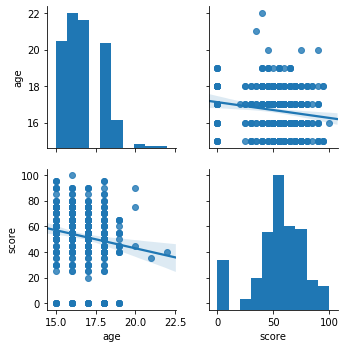

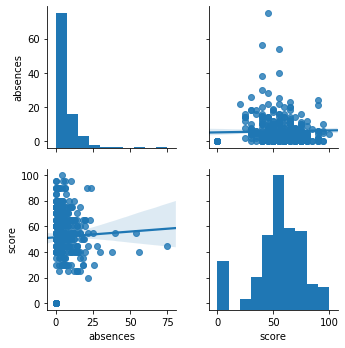

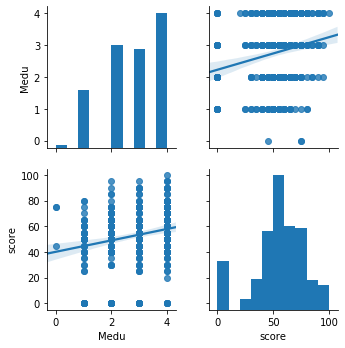

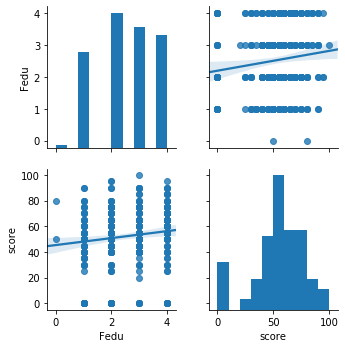

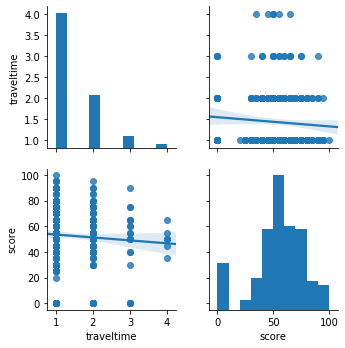

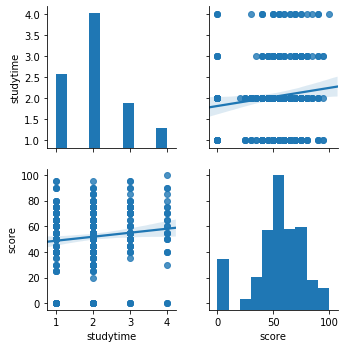

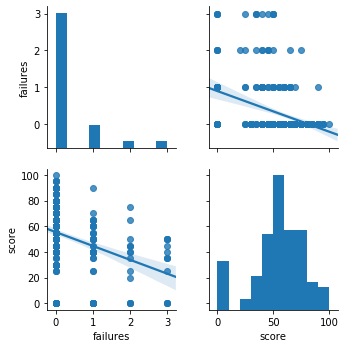

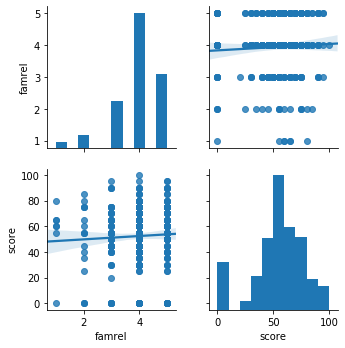

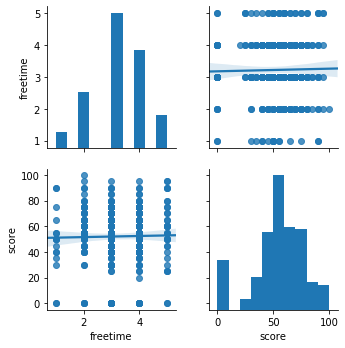

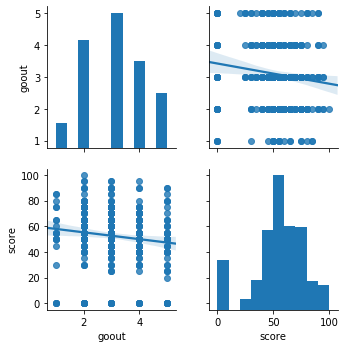

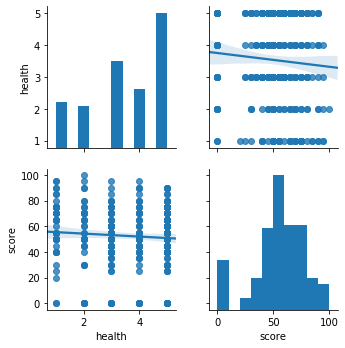

In [5]:
for col in ['age', 'absences', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health']:
    corr_num(col)

Предсказуемо, оказалось, что чем меньше было неудач, тем лучше итоговая оценка. Любопытно, что образование матери - более значимый критерий, чем образование отца. Также видно, что у более молодых учащихся - больше шансов. Практически неважно, сколько свободного времени, сколько пропущено занятий, и какие отношения в семье.

Отбросим столбцы: absences, traveltime, famrel, freetime, health

In [6]:
for col in ['absences', 'traveltime', 'famrel', 'freetime', 'health']:
    m.drop([col], axis=1, inplace=True)

Проверим номинативные переменные, добавив к ним оценочные:

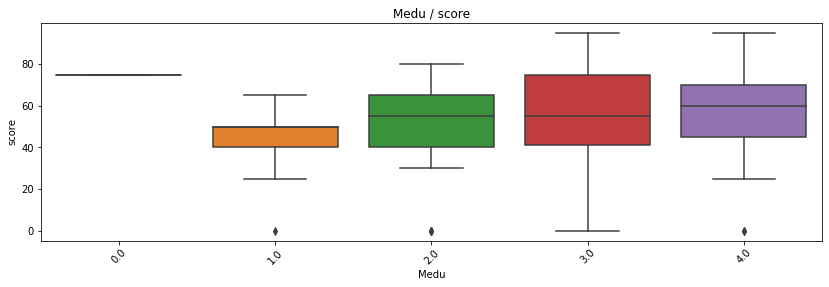

Найдены статистически значимые различия для колонки Medu


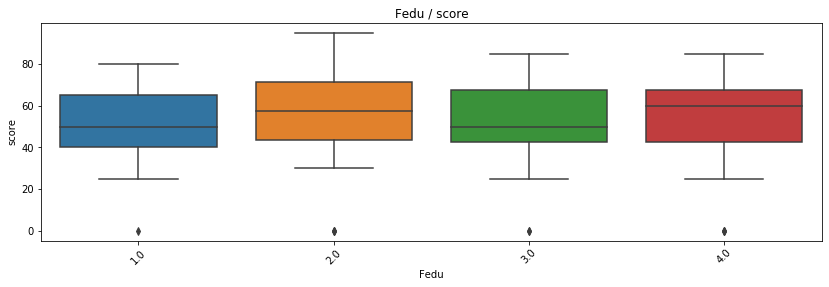

Найдены статистически значимые различия для колонки Fedu


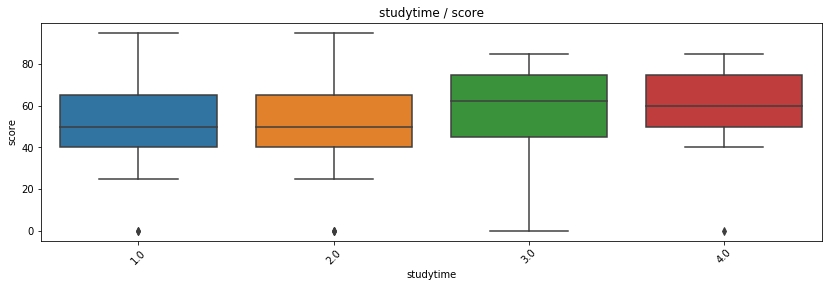

Найдены статистически значимые различия для колонки studytime


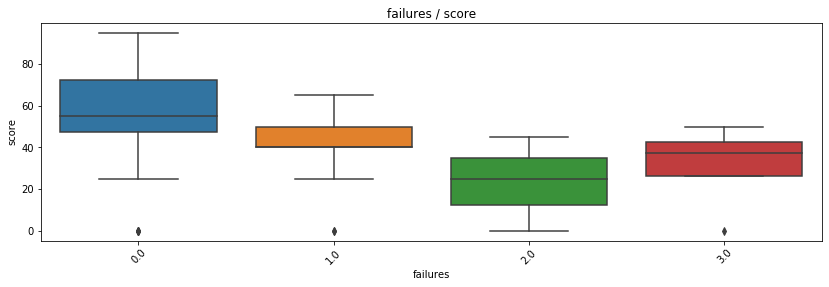

Найдены статистически значимые различия для колонки failures


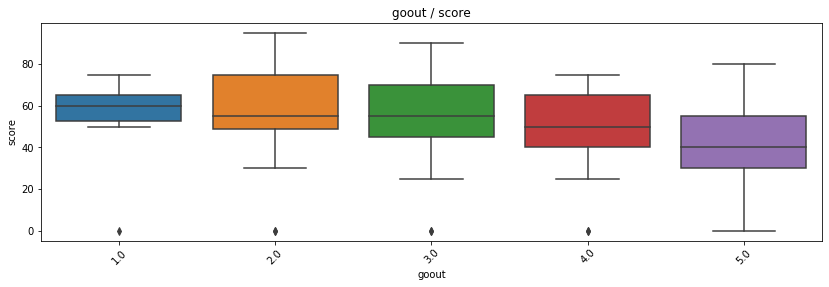

Найдены статистически значимые различия для колонки goout


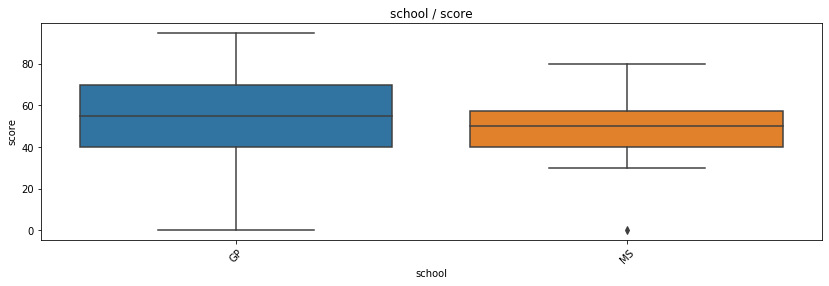

Найдены статистически значимые различия для колонки school


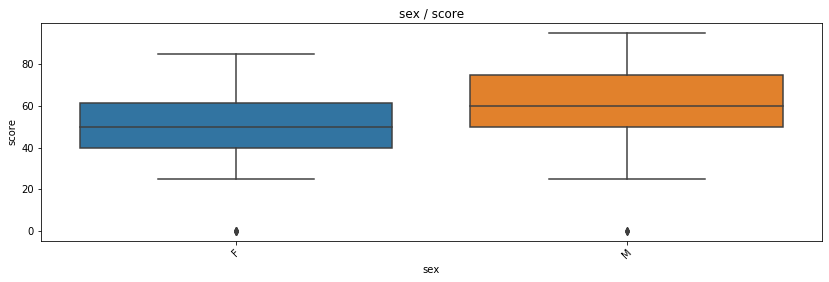

Найдены статистически значимые различия для колонки sex


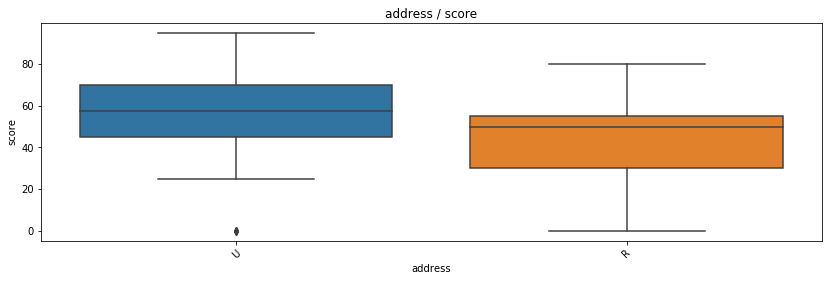

Найдены статистически значимые различия для колонки address


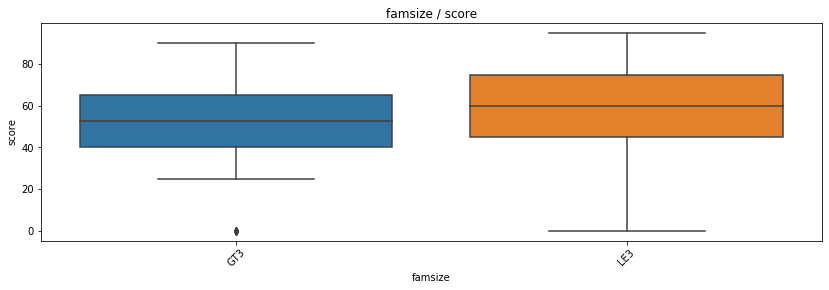

Найдены статистически значимые различия для колонки famsize


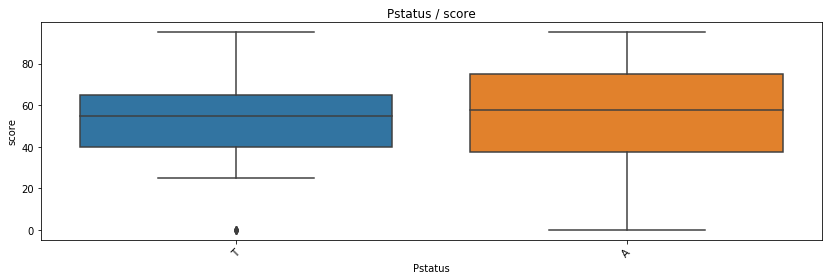

Найдены статистически значимые различия для колонки Pstatus


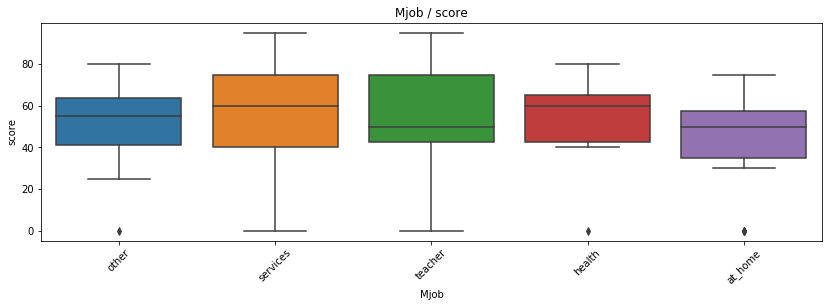

Найдены статистически значимые различия для колонки Mjob


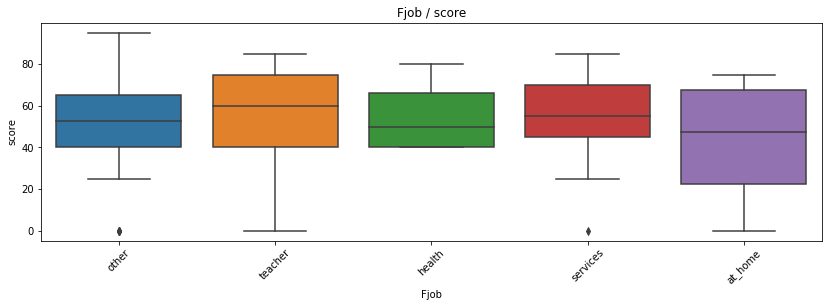

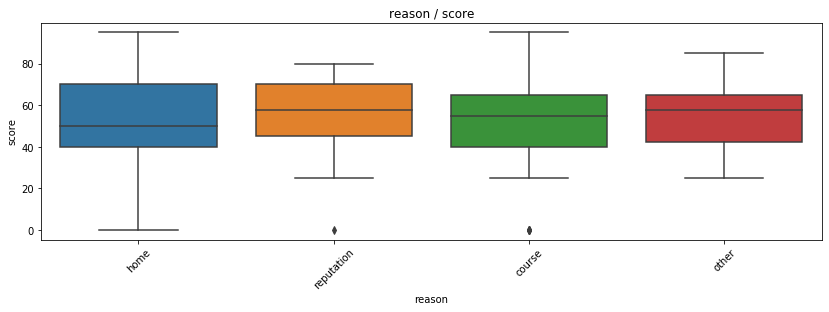

Найдены статистически значимые различия для колонки reason


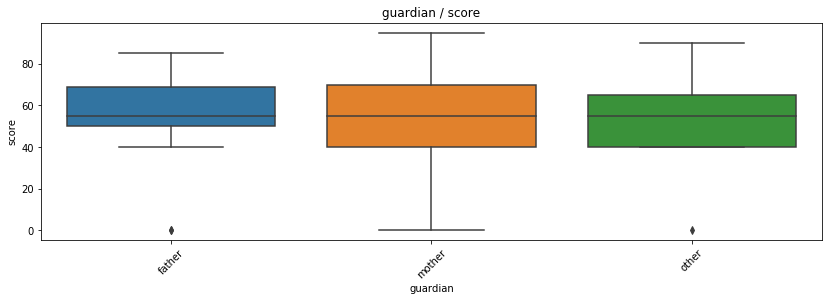

Найдены статистически значимые различия для колонки guardian


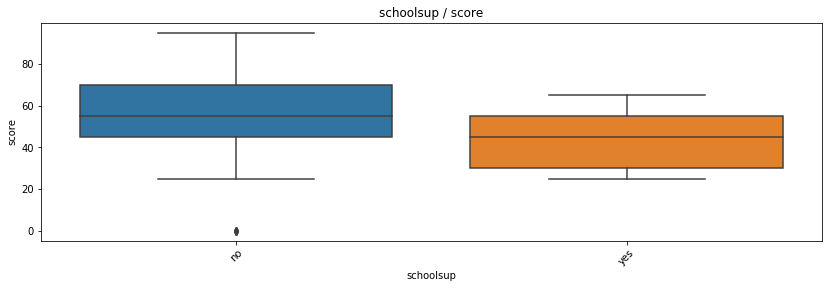

Найдены статистически значимые различия для колонки schoolsup


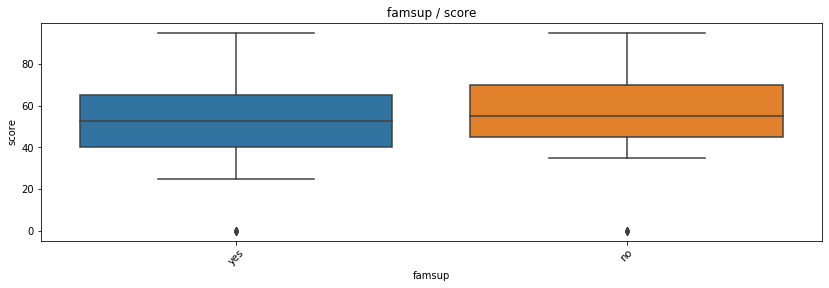

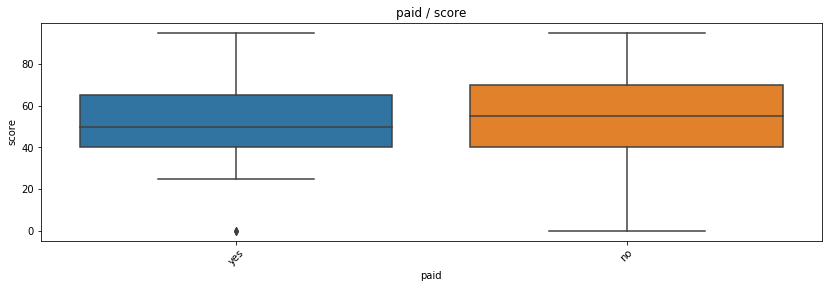

Найдены статистически значимые различия для колонки paid


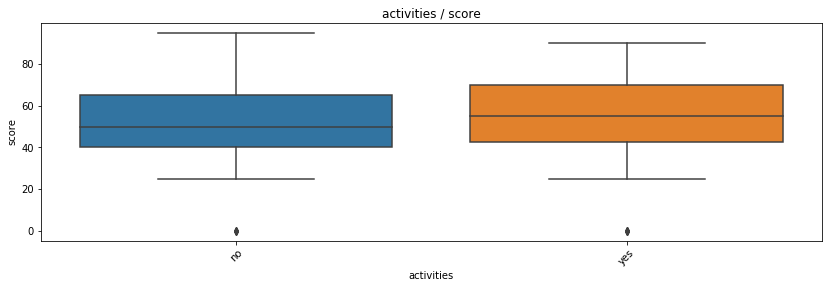

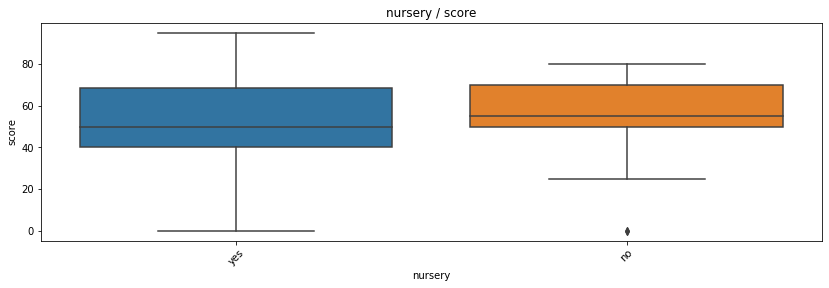

Найдены статистически значимые различия для колонки nursery


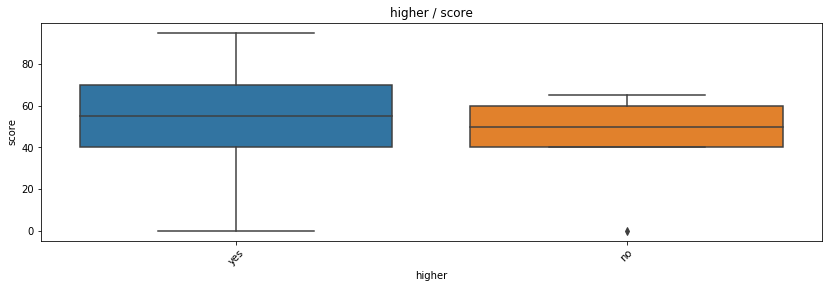

Найдены статистически значимые различия для колонки higher


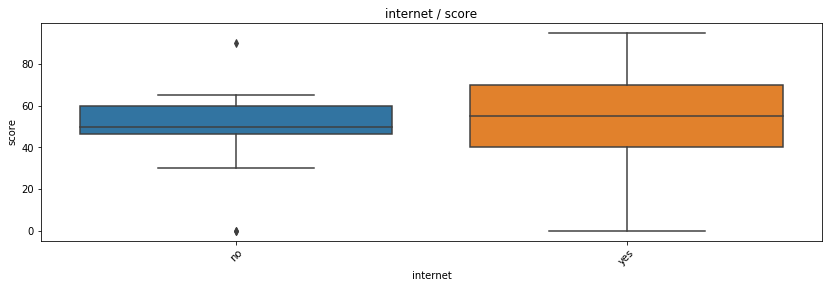

Найдены статистически значимые различия для колонки internet


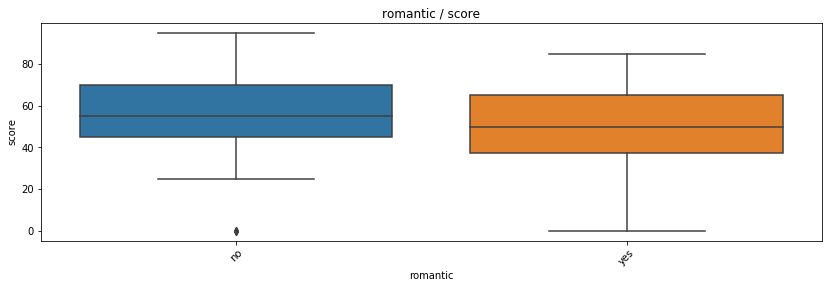

Найдены статистически значимые различия для колонки romantic


In [7]:
for col in ['Medu', 'Fedu', 'studytime', 'failures', 'goout', 'school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    corr_str(col)

Сначала отбросим столбцы, которые оказались не связанными с итоговой оценкой: Fjob, famsup, activities

In [8]:
for col in ['Fjob', 'famsup', 'activities']:
    m.drop([col], axis=1, inplace=True)

Посмотрим, что осталось:

In [9]:
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 21 columns):
school       395 non-null object
sex          395 non-null object
age          395 non-null int64
address      378 non-null object
famsize      368 non-null object
Pstatus      350 non-null object
Medu         392 non-null float64
Fedu         370 non-null float64
Mjob         376 non-null object
reason       378 non-null object
guardian     364 non-null object
studytime    388 non-null float64
failures     373 non-null float64
schoolsup    386 non-null object
paid         355 non-null object
nursery      379 non-null object
higher       375 non-null object
internet     361 non-null object
romantic     364 non-null object
goout        387 non-null float64
score        389 non-null float64
dtypes: float64(6), int64(1), object(14)
memory usage: 64.9+ KB


Всё ещё много: 20 параметров. Нужно их как-то упорядочить. Посчитаем p-value по тесту Стьюдента для комбинаций, и возьмём наименьшее для каждого столбца.

In [11]:
def stud_p(col):
    cols = m.loc[:, col].value_counts().index
    combinations_all = list(combinations(cols, 2))
    min_p = 1
    for comb in combinations_all:
        cur_p = ttest_ind(m.loc[m.loc[:, col] == comb[0], 'score'].dropna(),
                          m.loc[m.loc[:, col] == comb[1], 'score'].dropna()).pvalue * len(combinations_all)
        if cur_p < min_p:
            min_p = cur_p
    return min_p


tmp_df = pd.DataFrame(columns=['col', 'p'])
for col in m.columns:
    tmp_df = tmp_df.append([{'col': col, 'p': stud_p(col)}], ignore_index=True)
tmp_df = tmp_df.sort_values('p').reset_index(drop=True)

m_output = pd.DataFrame()
for i, r in tmp_df.iterrows():
    m_output = pd.concat([m_output, m[r['col']]], axis=1)

В итоге получилась таблица, в которой столбцы расположены по убыванию влияния на score.

In [12]:
m_output

,score,failures,Medu,higher,romantic,address,Mjob,goout,sex,paid,schoolsup,Fedu,age,studytime,internet,famsize,nursery,reason,school,Pstatus,guardian
0,30.0,0.0,4.0,yes,no,U,at_home,4.0,F,no,yes,4.0,18,2.0,NaN,NaN,yes,course,GP,A,mother
1,30.0,0.0,1.0,yes,no,U,at_home,3.0,F,no,no,1.0,17,2.0,yes,GT3,no,course,GP,NaN,father
2,50.0,3.0,1.0,yes,NaN,U,at_home,2.0,F,NaN,yes,1.0,15,2.0,yes,LE3,yes,other,GP,T,mother
3,75.0,0.0,4.0,yes,yes,U,health,2.0,F,yes,no,2.0,15,3.0,yes,GT3,yes,home,GP,T,mother
4,50.0,0.0,3.0,yes,no,U,other,2.0,F,yes,no,3.0,16,2.0,no,GT3,yes,home,GP,T,father
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,45.0,2.0,2.0,yes,no,U,services,4.0,M,yes,no,2.0,20,2.0,no,LE3,yes,course,MS,A,NaN
391,80.0,0.0,3.0,yes,no,U,services,5.0,M,no,no,1.0,17,1.0,yes,LE3,no,course,MS,T,mother
392,35.0,3.0,1.0,NaN,no,R,other,3.0,M,no,NaN,1.0,21,1.0,no,GT3,no,course,MS,T,NaN
393,50.0,0.0,3.0,yes,no,R,services,1.0,M,no,no,2.0,18,1.0,yes,LE3,no,course,MS,T,mother


В дальнейшем можно будет пользоваться этими данными для быстрого определения предположительной оценки учащегося.